# Admission Predict

## Michael Mendoza - Danilo Valero - Efrain Vasquez

In [1]:
# dependecies for every section
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

For this project we'll use a dataset for admission prediction. If do you want to know more, review this link: https://www.kaggle.com/mohansacharya/graduate-admissions

In [2]:
# loading data of real estates
df = pd.read_csv('admission_predict.csv')

In [3]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


1- Get the information of X and t, the t's data is the last column of df (0.2).

In [4]:
tTotal=df.values[0:400,8:]
XTotal=np.hstack((np.ones(tTotal.shape),(df.values[0:400,1:8])))

2- Plot the chance of admit stored in t (0.2)

Text(0, 0.5, 'Chance of Admit')

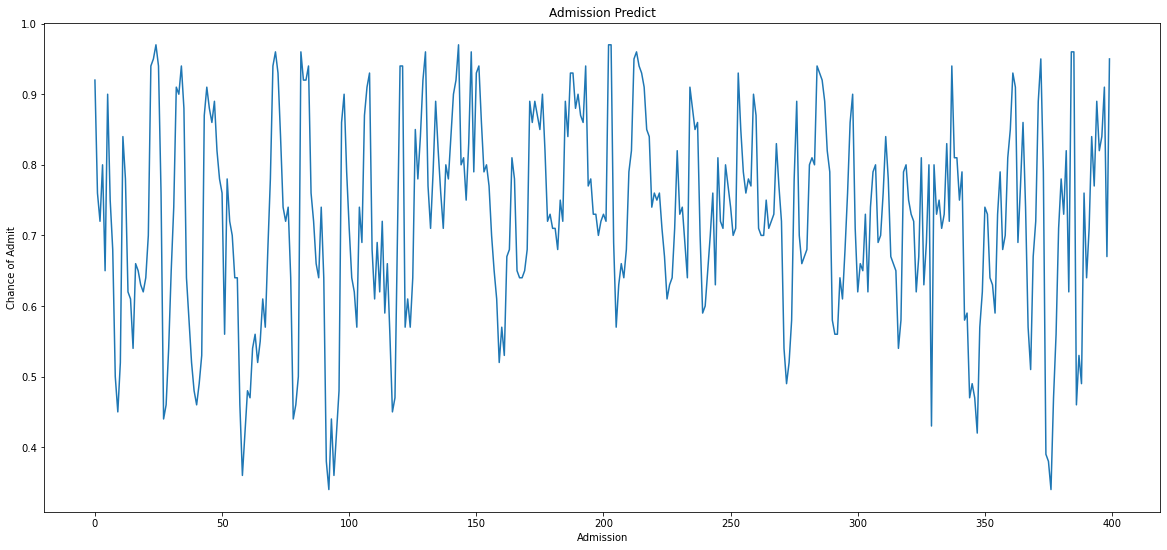

In [5]:
plt.figure(figsize=[20,9])
plt.plot(tTotal)
plt.title('Admission Predict')
plt.xlabel('Admission')
plt.ylabel('Chance of Admit')

In [6]:
# Funcion para calcular W 
def calcularW(x,t):
     return (np.linalg.inv((x.T)@(x)))@(x.T)@(t)
    
# Funcion para calcular Tp (t prima)
def calcularTp(x,w):
    return x@w

# Funcion para calcular el error 
def calcularError(t,tp):
    
    sumatoria = 0
    for i in range(len(t)):
        sumatoria += ((tp[i]-t[i])**2)
        
    return (sumatoria/(2*len(t)))



3- Using the Least Squares method generate the training using the first 300 samples in the dataset. You should show 3 graphics using subplots for t vs  𝑡̂  : the first, show the interval from 0 to 100; second, the interval from 100 to 200; the last, the interval from 200 to 300. Also, print the error for the prediction (0.6).

In [7]:
t=tTotal[0:300,:]
X=XTotal[0:300,:]


fil,col= X.shape
media=np.mean(X,axis=0)
desvEstandar=np.std(X[:,0:8],axis=0)
desvEstandar[0]=1
print(desvEstandar)

[ 1.         11.41779265  6.07802874  1.16158895  0.98945973  0.88791892
  0.59133645  0.49714742]


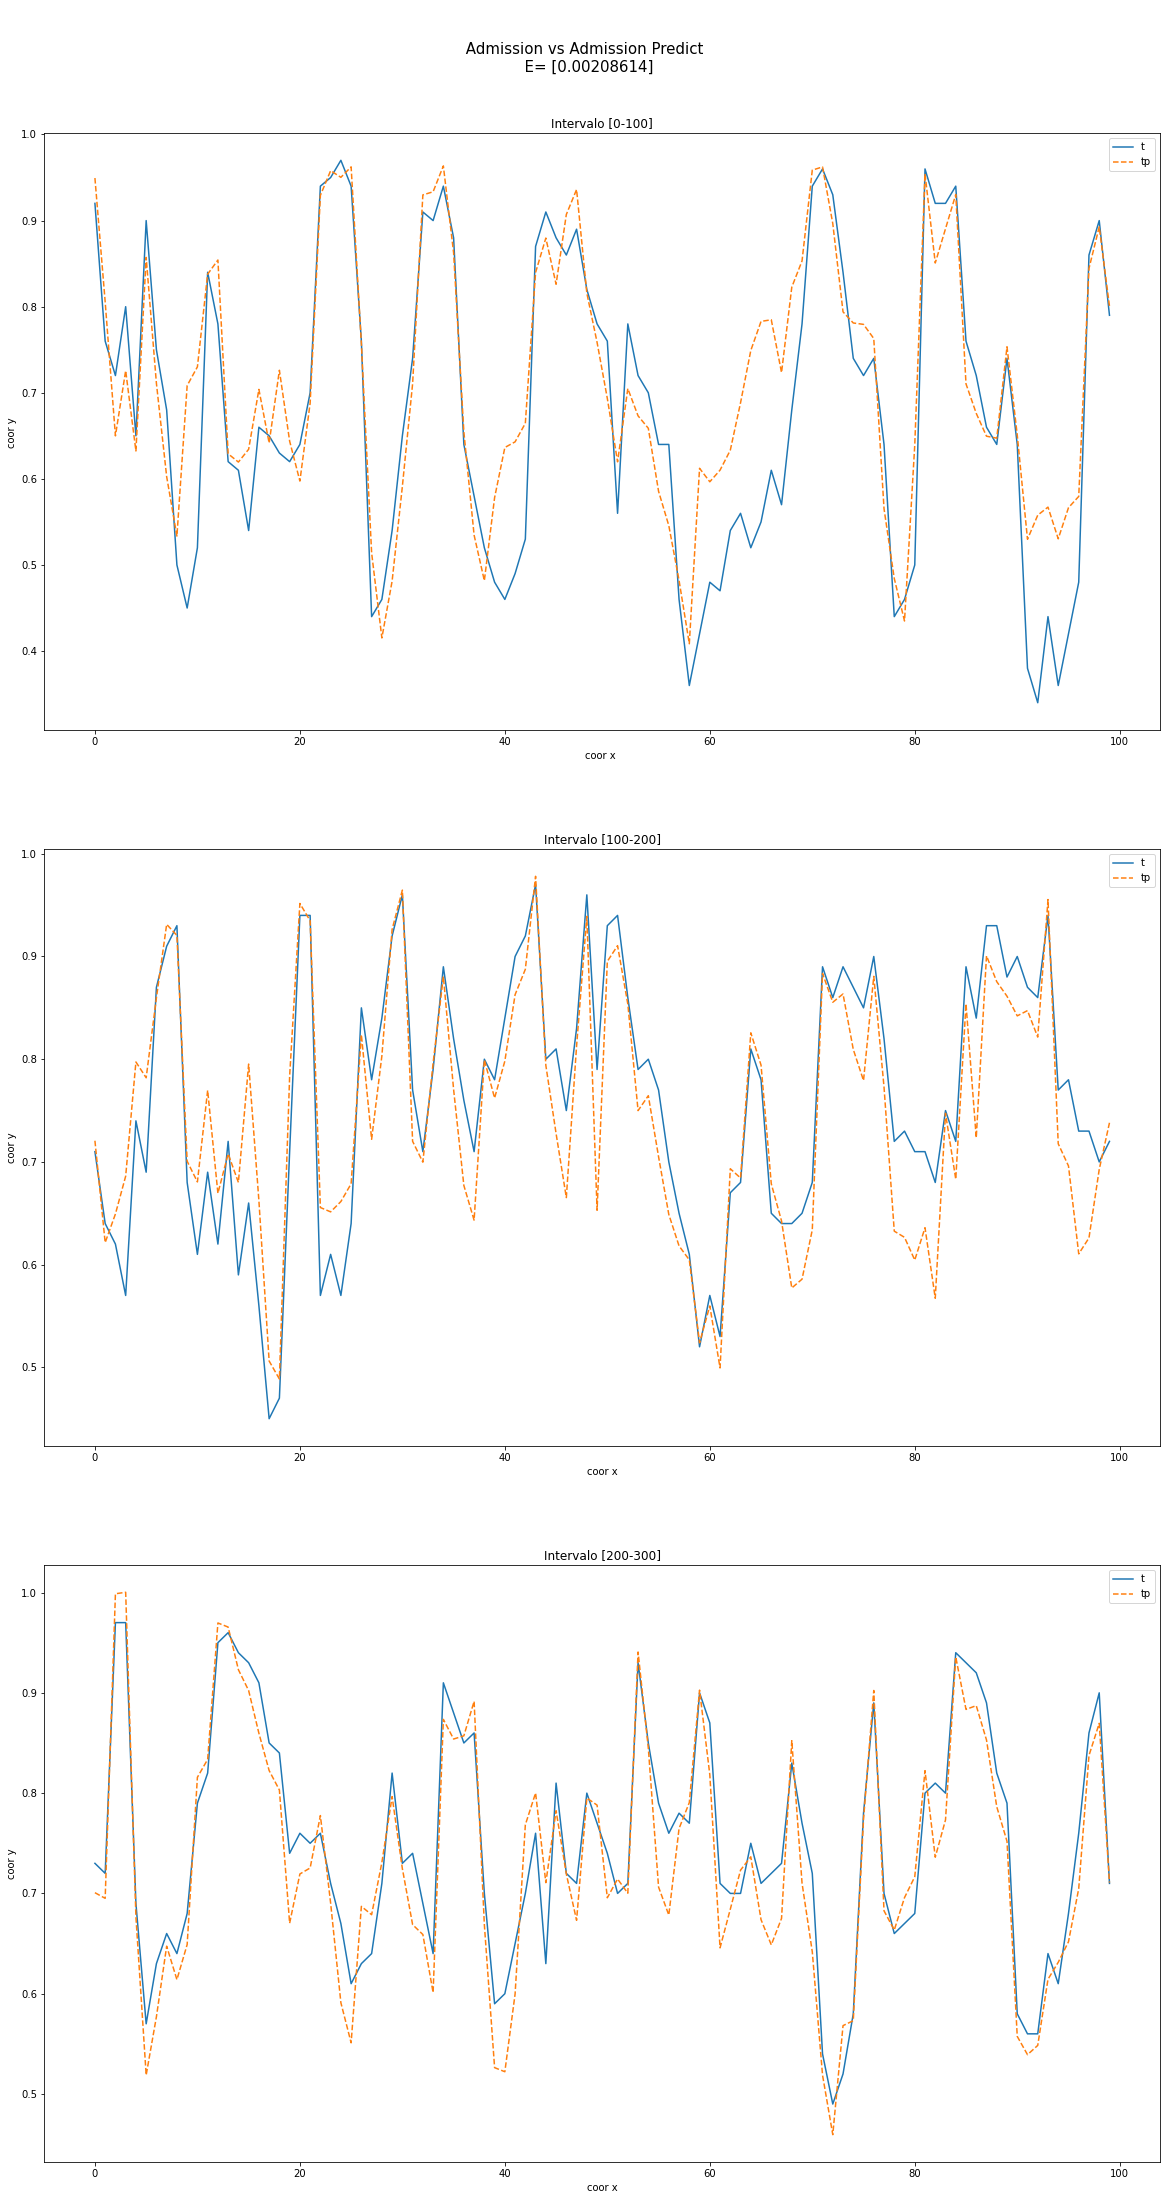

In [13]:
w=calcularW(X,t)
tp=calcularTp(X,w)
error=calcularError(t,tp)

plt.subplots(3,1,figsize=(20,35))
plt.suptitle('\n \n Admission vs Admission Predict \n  E= '+str(error), fontsize=15)
plt.subplot(3,1,1)
plt.plot(t[:100],'-',tp[:100],'--')
plt.title('Intervalo [0-100]')
plt.legend(['t','tp'])
plt.xlabel('coor x ')
plt.ylabel('coor y ')

plt.subplot(3,1,2)
plt.plot(t[100:200],'-',tp[100:200],'--')
plt.title('Intervalo [100-200]')
plt.legend(['t','tp'])
plt.xlabel('coor x')
plt.ylabel('coor y')

plt.subplot(3,1,3)
plt.plot(t[200:300],'-',tp[200:300],'--')
plt.title('Intervalo [200-300]')
plt.legend(['t','tp'])
plt.xlabel('coor x')
plt.ylabel('coor y')

plt.subplots_adjust(top=0.93)



4- Using gradient descent method and X normalized, generate the training using the first 300 samples in the dataset. You should show 3 graphics using subplots for t vs  𝑡̂  : the first, show the interval from 0 to 100; second, the interval from 100 to 200; the last, the interval from 200 to 300. Also, print the error for the prediction and the algorithm iterations.

The gradient descent method must use a maximum of 100,000 iterations and a stop condition based on learning never should reach 100,000 iterations (1.5).

In [27]:
# Normalizar X 
def normalizarX(x):
    xN=np.array(x)
    for i in range(len(x)):
        xN= (x[i]-media)/desvEstandar
    return xN

# Calcular Delta
def calcularDelta(tp,t,z):
        
    delta = (((tp-t)).T)@z
    
    return delta

# Calcular W con iteraciones menores a 100000
def calcularWGradienteDescendiente(x,t):
    iteraciones = 0
    eA=10000000
    aprendio=1000000
    while( iteraciones < 100000 and aprendio>0.007):    
        for i in range(len(w)):
            delta = calcularDelta(tp,t,x[:,i])      
            w[i] = w[i] - 0.0007 * delta 
            
            iteraciones+= 1
            
        tpE=x@w
        eO=calcularError(t,tpE)
        aprendio=eA-eO
        eA=eO     
    
    return w,iteraciones
    

In [28]:
xN = normalizarX(X)
w1 = calcularWGradienteDescendiente(xN,t)
tp1 = calcularTp(xN,w1)
err = calcularError(t,tp1)

print('El error general es: ',err)
print('Las iteraciones del metodo son: ', iteraciones)

plt.subplots(3,1,figsize=(20,35))
plt.suptitle('\n \n Admission vs Admission Predict \n  E= '+str(err), fontsize=15)
plt.subplot(3,1,1)
plt.plot(t[:100],'-',tp1[:100],'--')
plt.title('Intervalo [0-100]')
plt.legend(['t','tp'])
plt.xlabel('coor x ')
plt.ylabel('coor y ')

plt.subplot(3,1,2)
plt.plot(t[100:200],'-',tp1[100:200],'--')
plt.title('Intervalo [100-200]')
plt.legend(['t','tp'])
plt.xlabel('coor x')
plt.ylabel('coor y')

plt.subplot(3,1,3)
plt.plot(t[200:300],'-',tp1[200:300],'--')
plt.title('Intervalo [200-300]')
plt.legend(['t','tp'])
plt.xlabel('coor x')
plt.ylabel('coor y')

plt.subplots_adjust(top=0.93)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

5- What do you can interpret so far? What do you think about models generated with the both methods? (0.5)

Podemos interpretar que ambos modelos se adaptan a la predicción real mientras aunque el modelo de gradiente descendente  genera menos picos en comparación al modelo de minimos cuadrados, ademas se puede evidenciar que los errores no varian 

6- Using the models got, generate two predictions for the last 100 samples from the dataset. What prediction is better? What do you interpret? Generate and compare the three ts. (1.5)

La predicción que nosostros consideramos que es mejor, es la realizada con el modelo de gradiente descendente, ya que esta no genera tantos picos como la predicción de minimos cuadrados y se adapta a la predicción original, tambien podemos evidenciar que tanto el modelo de minimos cuadrados y el de gradiente son muy parecidos y ambos son buenos modelos que se acercan al modelo original

In [11]:
tFinal=tTotal[300:400,:]
XFinal=XTotal[300:400,:]

fil,col= XFinal.shape
media=np.mean(XFinal,axis=0)
desvEstandar=np.std(XFinal[:,0:8],axis=0)
desvEstandar[0]=1 

#### Comparación de las 3 t

In [12]:
tpFinal=calcularTp(XFinal,w)
xNFinal = normalizarX(XFinal)
tp1Final = calcularTp(xNFinal,w1)

plt.subplots(1,1,figsize=(20,35))
plt.suptitle('\n \n Admission vs Admission Predict \n' , fontsize=15)
plt.subplot(3,1,1)
plt.plot(tTotal[300:400],'-',tpFinal,'g',tp1Final)
plt.title('Intervalo [300-400]')
plt.legend(['t','tpMinimos','tpGradiente'])
plt.xlabel('coor x ')
plt.ylabel('coor y ')


plt.subplots_adjust(top=0.94)

NameError: name 'w1' is not defined

7- If you should choose one function (Pol, Exp, or Sig) to generate a good training set for current t (Chance of Admit), which you'll choose and why? (0.5)

si nosotros escogieramos alguna de las funciones polinmiales,exponenciales o sigmoidales para generar un buen set de enttrenamiento escogeriamos la función polinomial ya que se adapta mas al modelo, al igual que notamos que hay un margen de error mucho menor a los otros modelos obtenidos en las diferentes funciones.

#### Función Polinomial

In [155]:
# funcion para calcular w
def calcularW(phi,t):
     return (np.linalg.inv((phi.T)@(phi)))@(phi.T)@(t)
    
# funcion phi polinomial
def calcularPhiPol(m):
    phi = np.zeros((len(t),m))
    xPol = np.arange(len(t))
    aux = 0
    
    for i in range(len(t)):
        for j in range(m):
            phi[i][j] = xPol[i]**aux
            aux += 1
        aux = 0
        
    return phi

def calcularTp1(wFun,phi):
    
    tp = np.arange(len(t))*0
    
    for i in range(len(t)):
        for j in range(len(wFun)):
            tp[i] += (wFun[j]*phi[i][j])
    return tp

def CalcularErrorCMedio(m,t,tp):
    
    sumatoria = 0
    for i in range(len(tp)):
        sumatoria += ((tp[i]-t[i])**2)
        
    return (sumatoria/(2*len(t)*m))

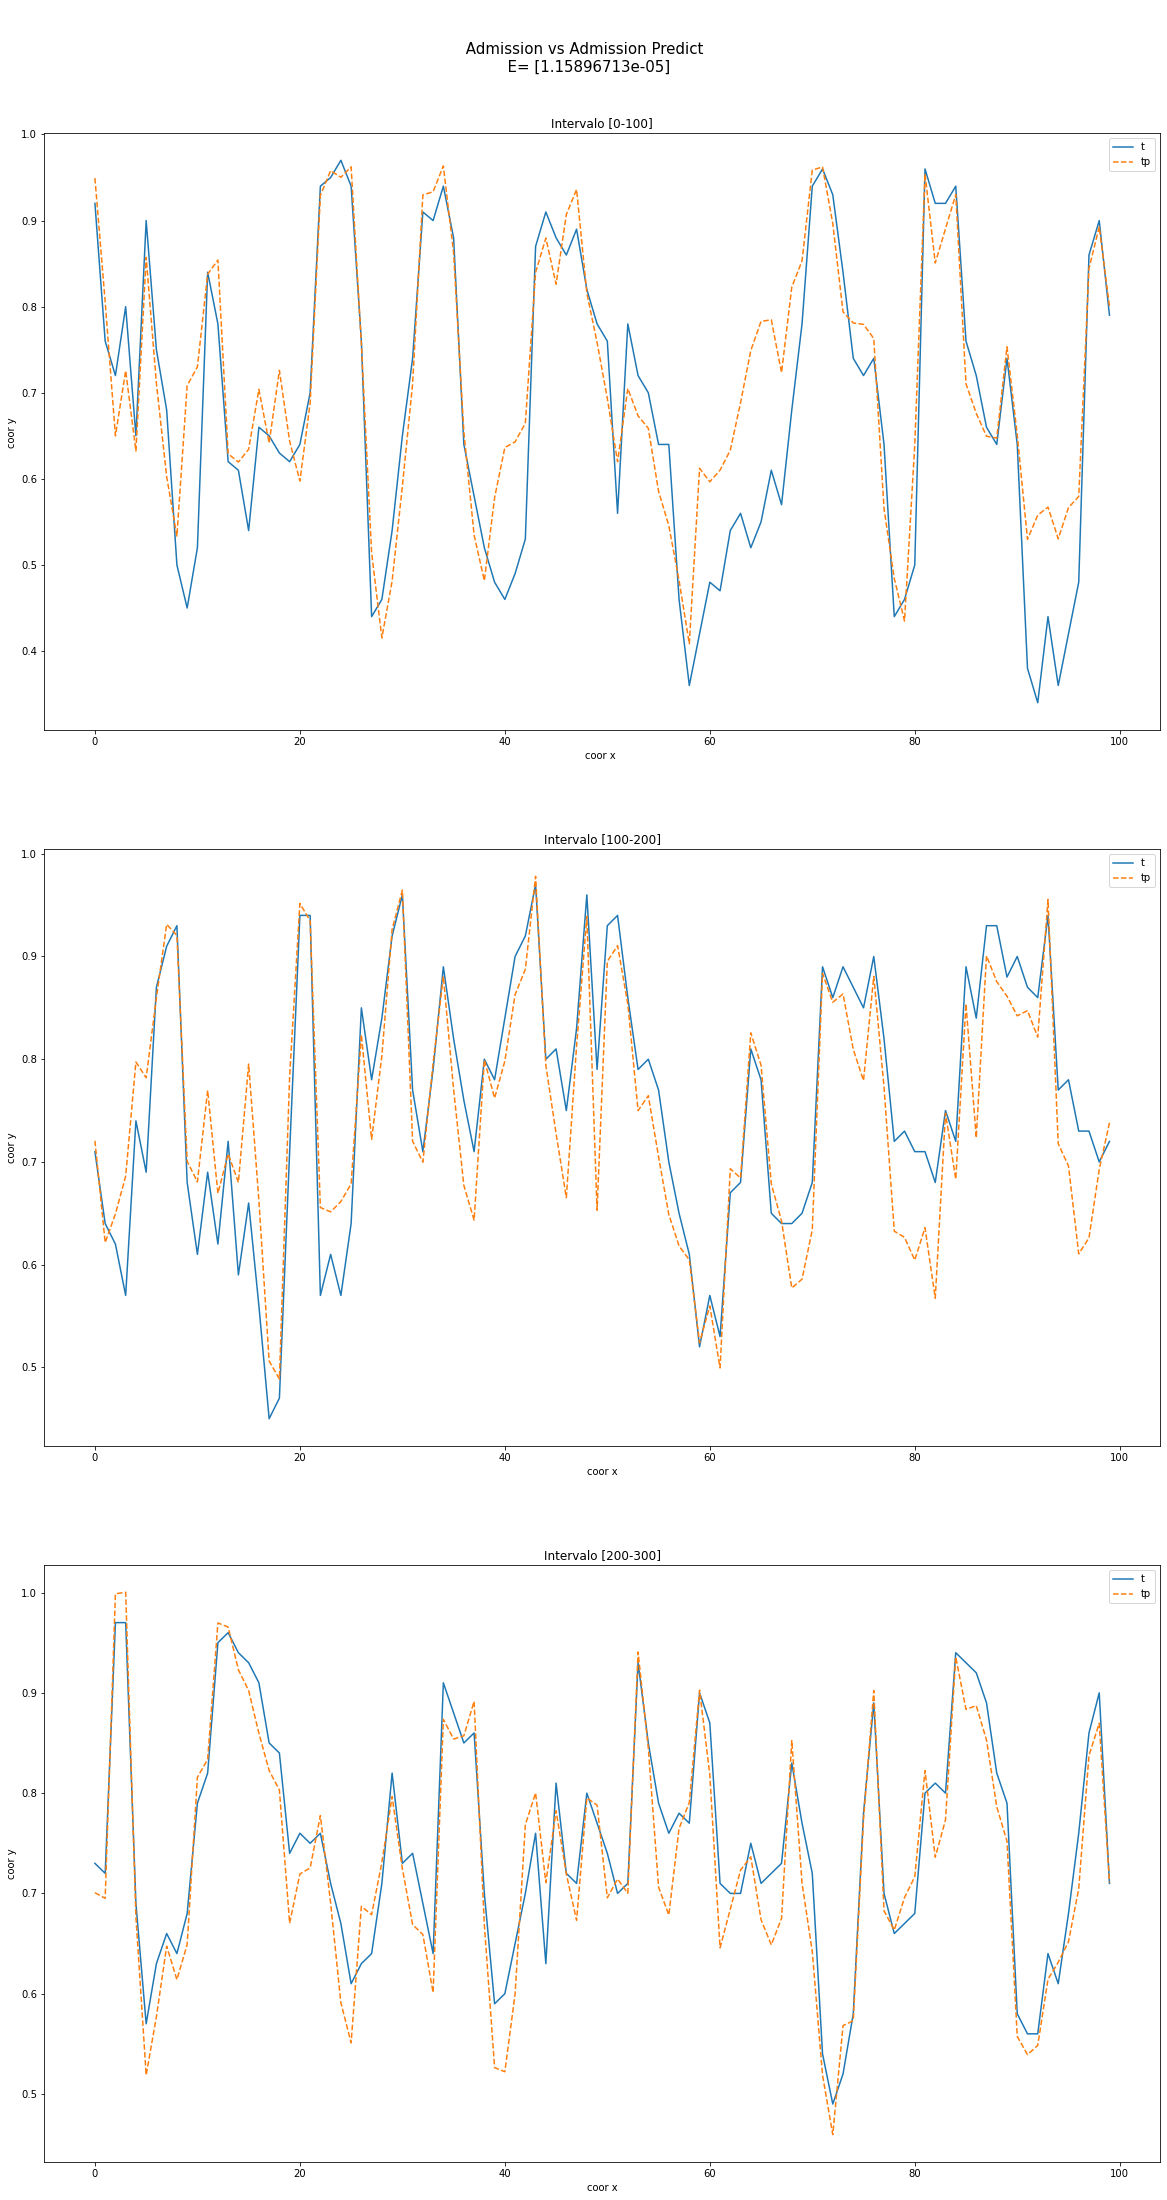

In [172]:
mPol = 180
phiPol = calcularPhiPol(mPol)
wPol = calcularW(phiPol,t)
tpPol = calcularTp1(wPol, phiPol)
errPol = CalcularErrorCMedio(mPol,t,tp)

plt.subplots(3,1,figsize = (20,35))
plt.suptitle('\n \n Admission vs Admission Predict \n  E= '+str(errPol), fontsize=15)
plt.subplot(3,1,1)
plt.plot(t[:100],'-',tp[:100],'--')
plt.title('Intervalo [0-100]')
plt.legend(['t','tp'])
plt.xlabel('coor x ')
plt.ylabel('coor y ')

plt.subplot(3,1,2)
plt.plot(t[100:200],'-',tp[100:200],'--')
plt.title('Intervalo [100-200]')
plt.legend(['t','tp'])
plt.xlabel('coor x')
plt.ylabel('coor y')

plt.subplot(3,1,3)
plt.plot(t[200:300],'-',tp[200:300],'--')
plt.title('Intervalo [200-300]')
plt.legend(['t','tp'])
plt.xlabel('coor x')
plt.ylabel('coor y')

plt.subplots_adjust(top=0.93)

#### Funcional Exponencial

In [157]:
# funcion phi exponencial
def calcularPhiExp(m,t):
    
    phi = np.zeros((len(t),m))
    media = np.linspace(0,100,m)
    x = np.linspace(0,100,len(t))
    
    for i in range(len(t)):
        for j in range(len(media)):
            phi[i][j] = np.exp(-(((x[i]-media[j])**2)/(2*(0.02**2))))
        
    phi[:,0] = 1
    return phi

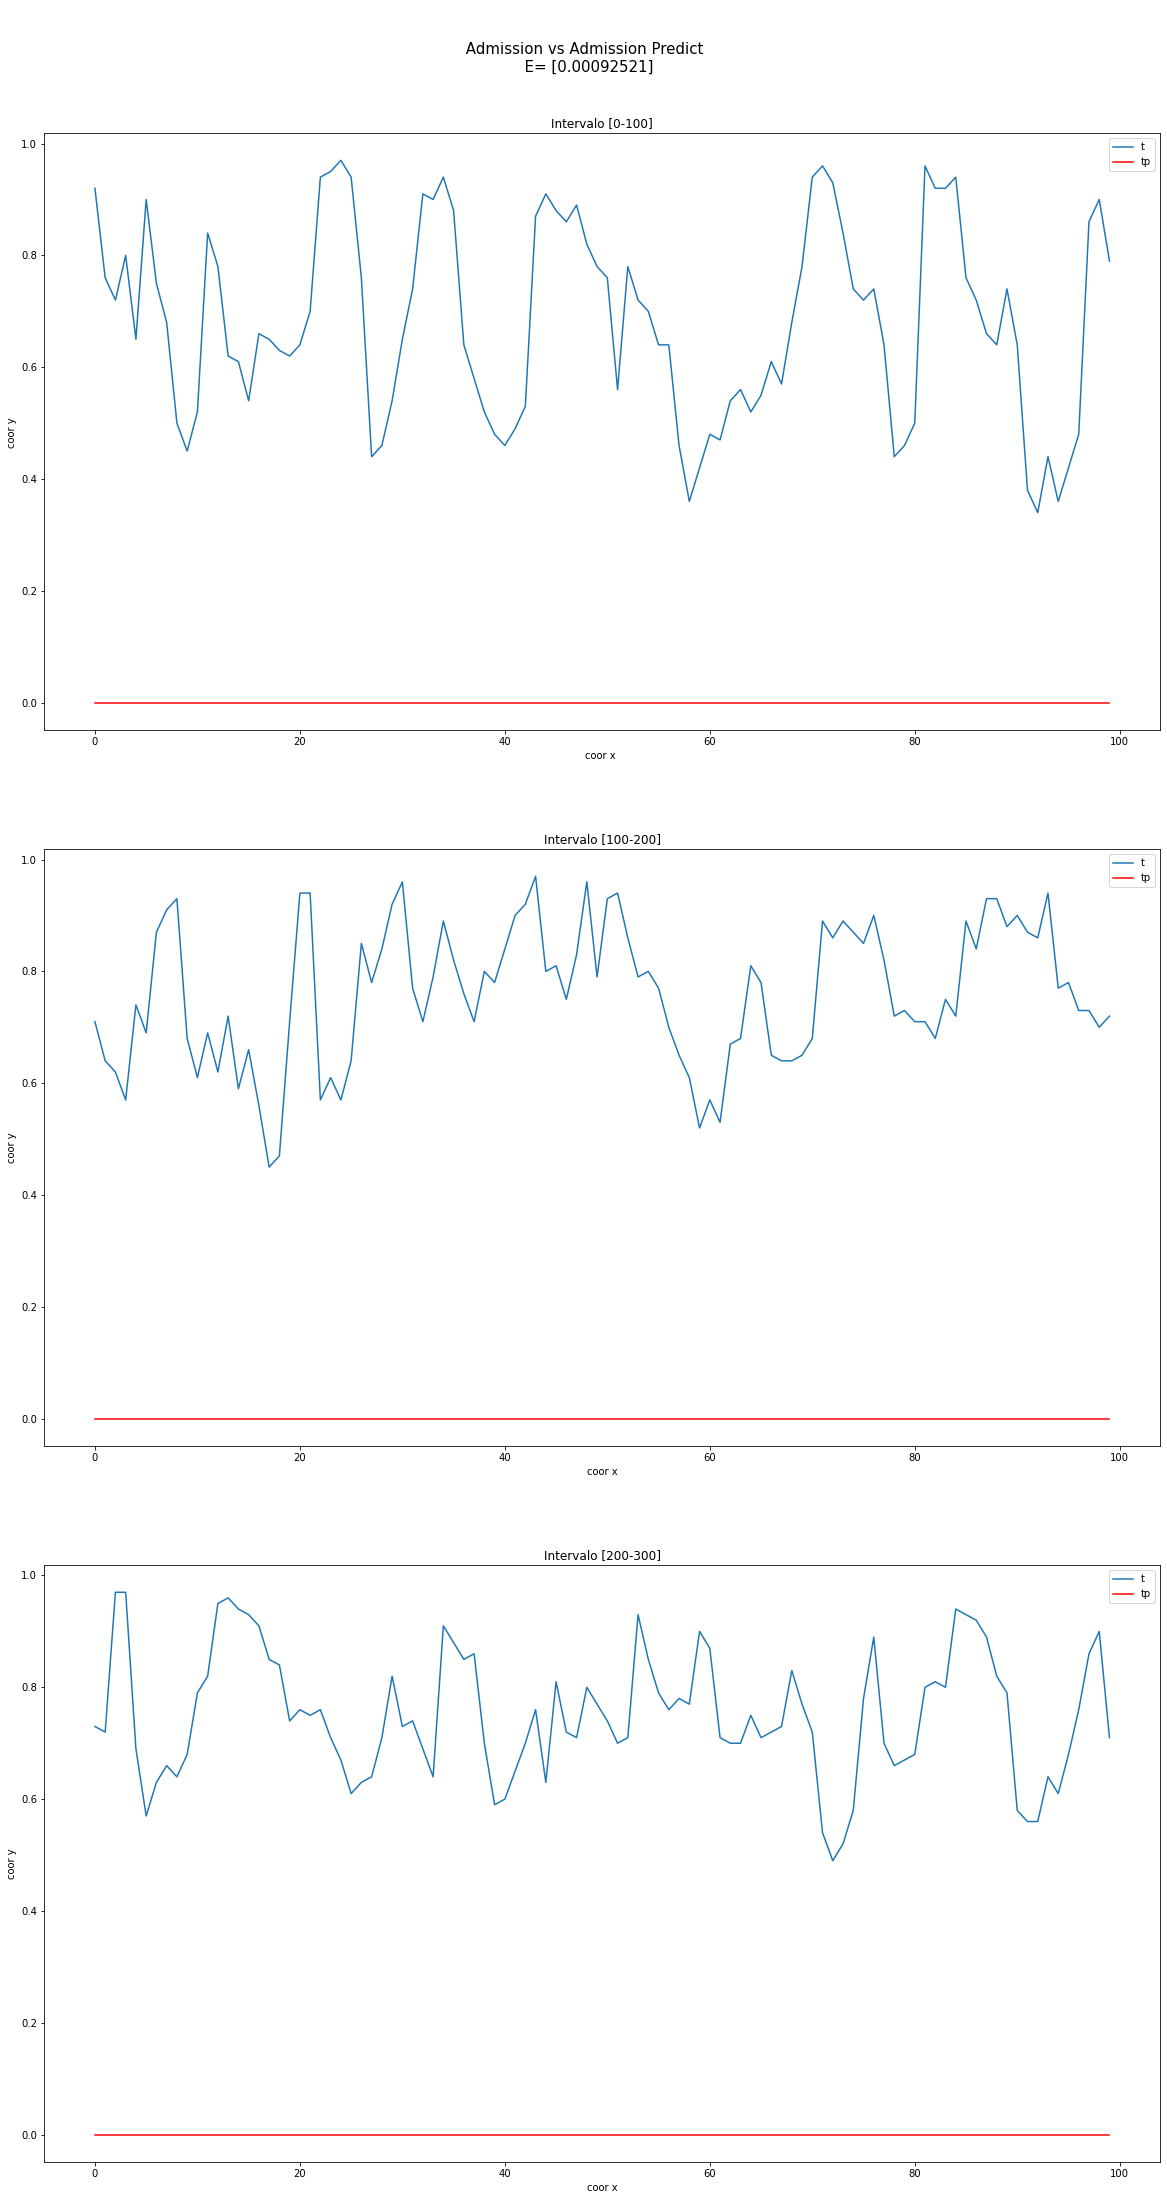

In [158]:
mExp = 300
phiExp = calcularPhiExp(mExp,t)
wExp = calcularW(phiExp,t)
tpExp = calcularTp1(wExp,phiExp)
errExp = CalcularErrorCMedio(mExp,t,tpExp)

plt.subplots(3,1,figsize = (20,35))
plt.suptitle('\n \n Admission vs Admission Predict \n  E= '+str(errExp), fontsize=15)
plt.subplot(3,1,1)
plt.plot(t[:100],'-',tpExp[:100],'r')
plt.title('Intervalo [0-100]')
plt.legend(['t','tp'])
plt.xlabel('coor x ')
plt.ylabel('coor y ')

plt.subplot(3,1,2)
plt.plot(t[100:200],'-',tpExp[100:200],'r')
plt.title('Intervalo [100-200]')
plt.legend(['t','tp'])
plt.xlabel('coor x')
plt.ylabel('coor y')

plt.subplot(3,1,3)
plt.plot(t[200:300],'-',tpExp[200:300],'r')
plt.title('Intervalo [200-300]')
plt.legend(['t','tp'])
plt.xlabel('coor x')
plt.ylabel('coor y')

plt.subplots_adjust(top=0.93)

#### Funcional Sigmoidal

In [159]:
# funcion phi Sigmoidal
def calcularPhiSigmoidal(m):
 
    phi = np.ones((len(t),m))
    media = np.linspace(0,400,m)
    x = np.linspace(0,400,len(t))
    s = 0.1
    
    for i in range(len(t)):
        for j in range(len(media)):
            
            a = ((x[i] - media[j])/s)
            phi[i][j] = (1/(1 + np.exp(-a)))

    phi[:,0] = 1
    return phi

<ipython-input-159-cbed63f83f9d>:13: RuntimeWarning: overflow encountered in exp
  phi[i][j] = (1/(1 + np.exp(-a)))


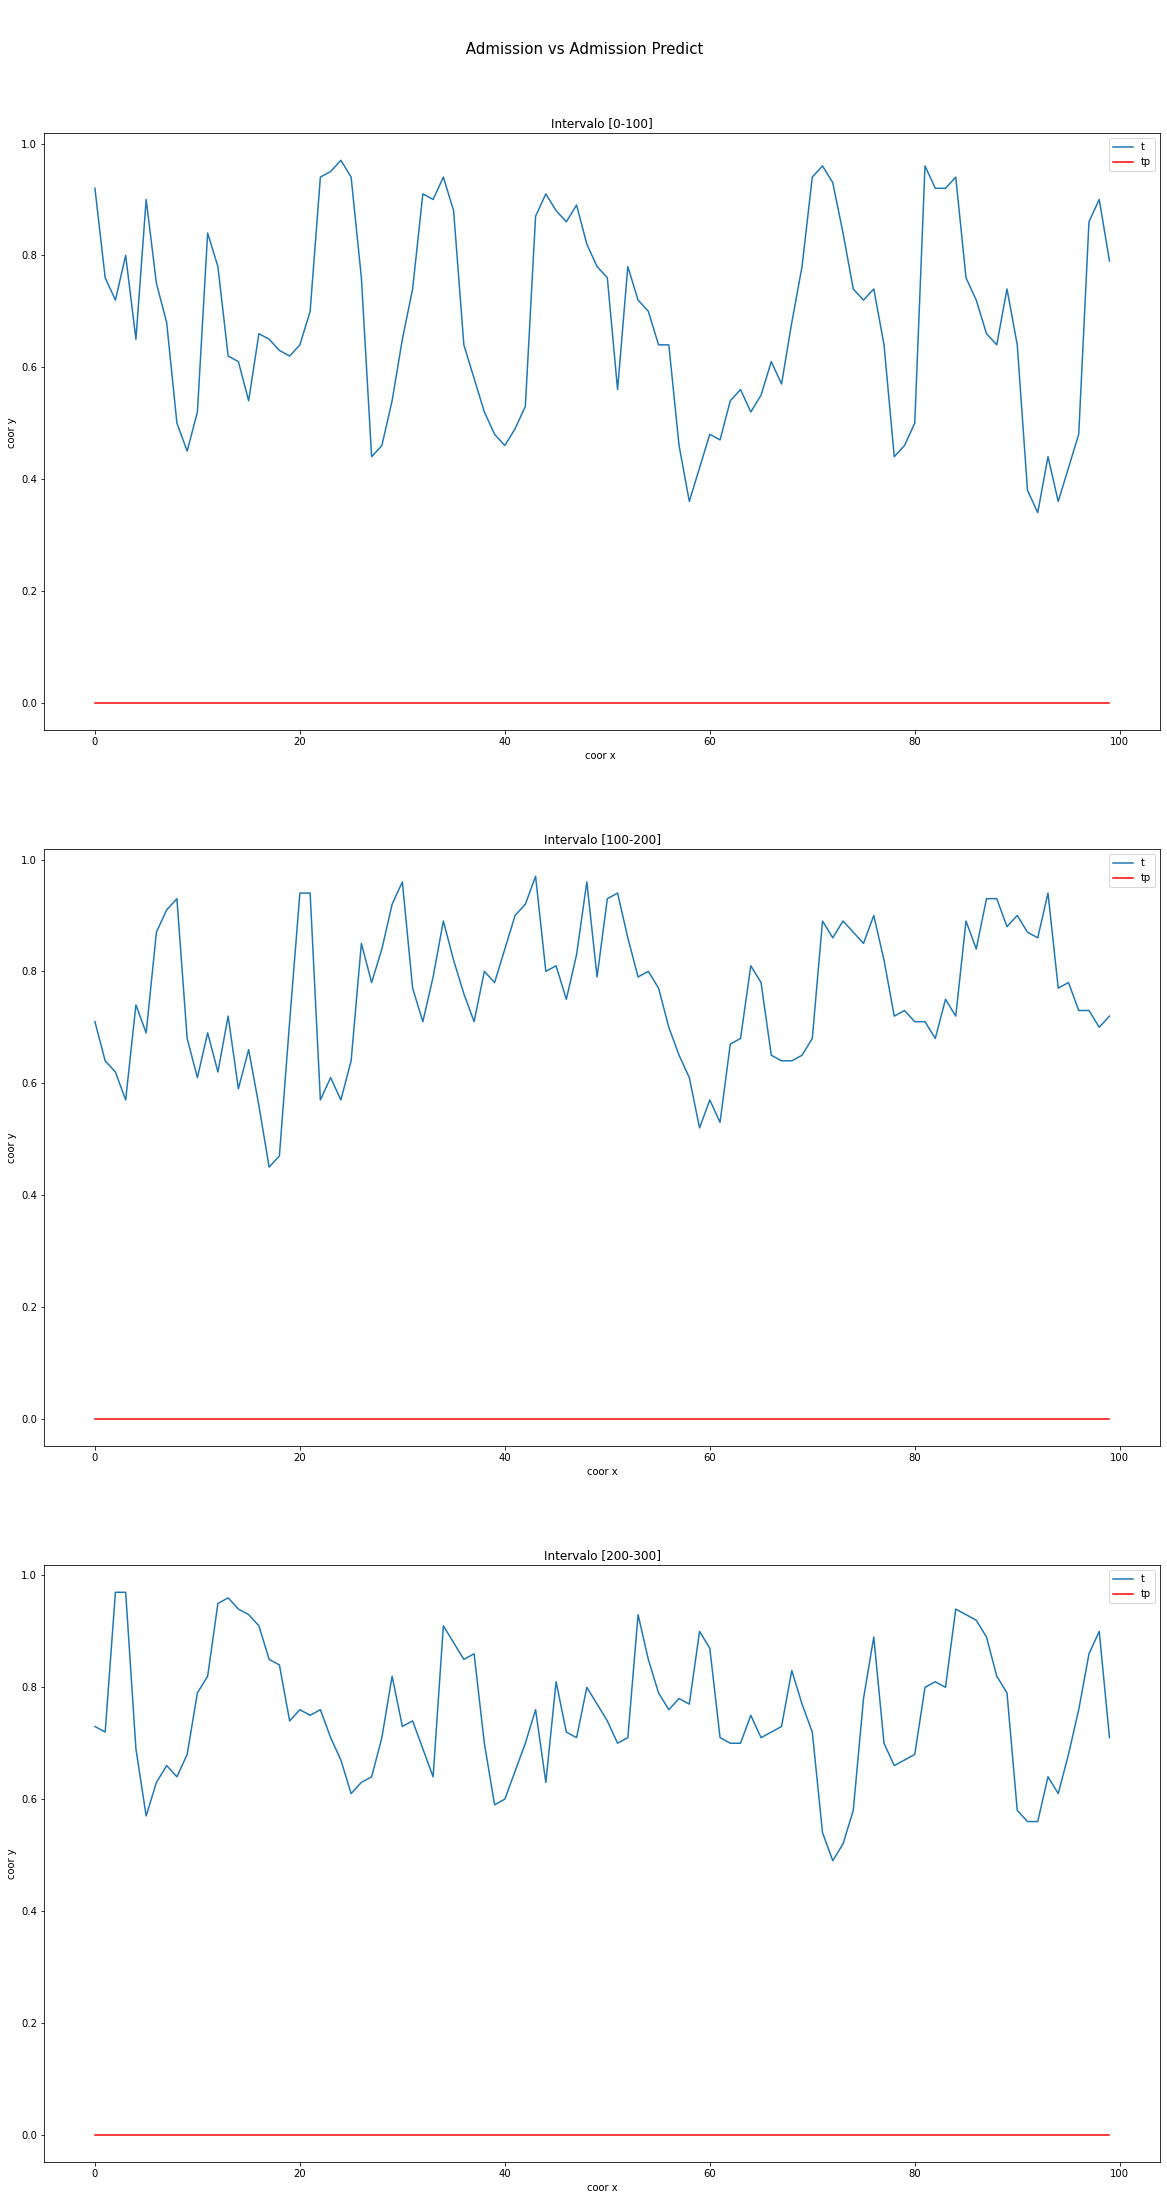

In [160]:
mSigmoidal = 300
phiSigmoidal = calcularPhiSigmoidal(mSigmoidal)
wSigmoidal = calcularW(phiSigmoidal,t)
tpSigmoidal = calcularTp1(wSigmoidal,phiSigmoidal)

plt.subplots(3,1,figsize = (20,35))
plt.suptitle('\n \n Admission vs Admission Predict \n', fontsize=15)
plt.subplot(3,1,1)
plt.plot(t[:100],'-',tpSigmoidal[:100],'r')
plt.title('Intervalo [0-100]')
plt.legend(['t','tp'])
plt.xlabel('coor x ')
plt.ylabel('coor y ')

plt.subplot(3,1,2)
plt.plot(t[100:200],'-',tpSigmoidal[100:200],'r')
plt.title('Intervalo [100-200]')
plt.legend(['t','tp'])
plt.xlabel('coor x')
plt.ylabel('coor y')

plt.subplot(3,1,3)
plt.plot(t[200:300],'-',tpSigmoidal[200:300],'r')
plt.title('Intervalo [200-300]')
plt.legend(['t','tp'])
plt.xlabel('coor x')
plt.ylabel('coor y')

plt.subplots_adjust(top=0.93)